In [2]:
import pandas as pd
import glob
import numpy as np
import os
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns

In [3]:
file_path = "/content/drive/MyDrive/stocks"

files = glob.glob(file_path + "/*.csv")
#We will only extract NASDAQ-100 and NASDAQ Financial-100 stock data

# 1 Webscraping Stock Tickers

In [4]:
#Webscraping NASDAQ-100 tickers
url_1 = "https://en.wikipedia.org/wiki/Nasdaq-100#Components"

html_1 = requests.get(url_1).text
soup_1 = BeautifulSoup(html_1, "html.parser")

print(soup_1)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Nasdaq-100 - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-lim

In [5]:
tickers_list1 = soup_1.find_all("table", {"id": "constituents"})

tickers_list1 #All the tickers but with extra information we don't need

[<table class="wikitable sortable" id="constituents">
 <tbody><tr>
 <th>Company</th>
 <th>Ticker</th>
 <th><a class="mw-redirect" href="/wiki/GICS" title="GICS">GICS</a> Sector</th>
 <th><a class="mw-redirect" href="/wiki/GICS" title="GICS">GICS</a> Sub-Industry
 </th></tr>
 <tr>
 <td><a href="/wiki/Adobe_Inc." title="Adobe Inc.">Adobe Inc.</a></td>
 <td>ADBE</td>
 <td>Information Technology</td>
 <td>Application Software
 </td></tr>
 <tr>
 <td><a href="/wiki/ADP_(company)" title="ADP (company)">ADP</a></td>
 <td>ADP</td>
 <td>Industrials</td>
 <td>Human Resource &amp; Employment Services
 </td></tr>
 <tr>
 <td><a href="/wiki/Airbnb" title="Airbnb">Airbnb</a></td>
 <td>ABNB</td>
 <td>Consumer Discretionary</td>
 <td>Hotels, Resorts &amp; Cruise Lines
 </td></tr>
 <tr>
 <td><a href="/wiki/Alphabet_Inc." title="Alphabet Inc.">Alphabet Inc.</a> (Class A)</td>
 <td>GOOGL</td>
 <td>Communication Services</td>
 <td>Interactive Media &amp; Services
 </td></tr>
 <tr>
 <td><a href="/wiki/Alphab

In [6]:
all_cells = []
for elements in tickers_list1:
  rows = elements.find_all("tr")
  for row in rows:
    row_cells = row.find_all("td")
    for cell in row_cells:
      all_cells.append(cell.text)

print(all_cells)
tickers_nasdaq100 = all_cells[1 :: 4]
print(tickers_nasdaq100) #Part of the stocks we need to extract from the dataset
len(tickers_nasdaq100)

['Adobe Inc.', 'ADBE', 'Information Technology', 'Application Software\n', 'ADP', 'ADP', 'Industrials', 'Human Resource & Employment Services\n', 'Airbnb', 'ABNB', 'Consumer Discretionary', 'Hotels, Resorts & Cruise Lines\n', 'Alphabet Inc. (Class A)', 'GOOGL', 'Communication Services', 'Interactive Media & Services\n', 'Alphabet Inc. (Class C)', 'GOOG', 'Communication Services', 'Interactive Media & Services\n', 'Amazon', 'AMZN', 'Consumer Discretionary', 'Broadline Retail\n', 'Advanced Micro Devices Inc.', 'AMD', 'Information Technology', 'Semiconductors\n', 'American Electric Power', 'AEP', 'Utilities', 'Electric Utilities\n', 'Amgen', 'AMGN', 'Health Care', 'Biotechnology\n', 'Analog Devices', 'ADI', 'Information Technology', 'Semiconductors\n', 'Ansys', 'ANSS', 'Information Technology', 'Application Software\n', 'Apple Inc.', 'AAPL', 'Information Technology', 'Technology Hardware, Storage & Peripherals\n', 'Applied Materials', 'AMAT', 'Information Technology', 'Semiconductor Equip

101

In [7]:
#Webscraping NASDAQ Financial-100
url_2 = "https://trendspider.com/learning-center/nasdaq-financial-100-index/"

headers = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}

html_2 = requests.get(url_2, headers=headers).text

soup_2 = BeautifulSoup(html_2, "html.parser")

table_tickers = soup_2.find("table")
table_tickers

<table><thead><tr><th class="has-text-align-left" data-align="left">Symbol</th><th class="has-text-align-left" data-align="left">Company name</th><th class="has-text-align-left" data-align="left"></th></tr></thead><tbody><tr><td class="has-text-align-left" data-align="left"><a aria-label="Symbol info: ABCB" class="inline-ticker" href="https://trendspider.com/markets/symbols/ABCB/" target="_blank"><i class="icon"><img alt="Logo of ABCB" decoding="async" height="32" loading="lazy" src="https://companieslogo.com/img2/32/ABCB-31c277355ed874e357b6ad-607328bd.png?t=1600951830" width="32"/></i><span>ABCB</span></a></td><td class="has-text-align-left" data-align="left"><a href="https://trendspider.com/markets/symbols/ABCB/" rel="noreferrer noopener" target="_blank">Ameris Bancorp</a></td><td class="has-text-align-left" data-align="left"><a href="https://trendspider.com/markets/symbols/ABCB/" rel="noreferrer noopener" target="_blank">See free <strong>ABCB</strong> Stock Chart 🡒</a></td></tr><tr

In [8]:
tickers_list2 = table_tickers.find_all("td", {"class":"has-text-align-left"})
print(tickers_list2)

[<td class="has-text-align-left" data-align="left"><a aria-label="Symbol info: ABCB" class="inline-ticker" href="https://trendspider.com/markets/symbols/ABCB/" target="_blank"><i class="icon"><img alt="Logo of ABCB" decoding="async" height="32" loading="lazy" src="https://companieslogo.com/img2/32/ABCB-31c277355ed874e357b6ad-607328bd.png?t=1600951830" width="32"/></i><span>ABCB</span></a></td>, <td class="has-text-align-left" data-align="left"><a href="https://trendspider.com/markets/symbols/ABCB/" rel="noreferrer noopener" target="_blank">Ameris Bancorp</a></td>, <td class="has-text-align-left" data-align="left"><a href="https://trendspider.com/markets/symbols/ABCB/" rel="noreferrer noopener" target="_blank">See free <strong>ABCB</strong> Stock Chart 🡒</a></td>, <td class="has-text-align-left" data-align="left"><a aria-label="Symbol info: ACGL" class="inline-ticker" href="https://trendspider.com/markets/symbols/ACGL/" target="_blank"><i class="icon"><img alt="Logo of ACGL" decoding="a

In [9]:
tickers_financial100 = []

for el in tickers_list2:
  for row in el:
    if row.find("span") == None:
      continue
    else:
      ticker = row.find("span")
    tickers_financial100.append(ticker.text)

print(tickers_financial100) #The other part of the stocks that we need to extract from the dataset
len(tickers_financial100)

['ABCB', 'ACGL', 'AUB', 'BANF', 'BANR', 'BHF', 'BOKF', 'BPOP', 'CACC', 'CATY', 'CBSH', 'CFFN', 'CG', 'CINF', 'CLBK', 'CME', 'COLB', 'CVBF', 'EBC', 'EHTH', 'ERIE', 'ESGR', 'EWBC', 'FCFS', 'FCNCA', 'FFBC', 'FFIN', 'FHB', 'FITB', 'FOCS', 'FRME', 'FULT', 'FUTU', 'GBCI', 'GSHD', 'HBAN', 'HLNE', 'HOMB', 'HTLF', 'HWC', 'IBKR', 'IBOC', 'IBTX', 'KNSL', 'LOB', 'LPLA', 'LPRO', 'MKTX', 'MORN', 'NAVI', 'NDAQ', 'NMIH', 'NTRS', 'ONB', 'OPEN', 'PACW', 'PFG', 'PNFP', 'PPBI', 'QFIN', 'RILY', 'RNST', 'SASR', 'SBCF', 'SFNC', 'SIGI', 'SLM', 'TCBI', 'TFSL', 'TOWN', 'TREE', 'TRMK', 'TROW', 'TRUP', 'TW', 'UBSI', 'UCBI', 'UMBF', 'UPST', 'VIRT', 'VLY', 'VRTS', 'WABC', 'WAFD', 'WERN', 'WSFS', 'WTFC', 'XP', 'ZION']


89

In [10]:
needed_tickers = tickers_nasdaq100 + tickers_financial100
print(needed_tickers)
print(len(needed_tickers))

for i in range(0, 190):
  needed_tickers[i] = needed_tickers[i] + ".csv"

print(needed_tickers)

['ADBE', 'ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ARM', 'ASML', 'AZN', 'TEAM', 'ADSK', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CHTR', 'CTAS', 'CSCO', 'CCEP', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'DASH', 'EA', 'EXC', 'FAST', 'FTNT', 'GEHC', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LIN', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MDB', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'ON', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PDD', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SBUX', 'SNPS', 'TTWO', 'TMUS', 'TSLA', 'TXN', 'TTD', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZS', 'ABCB', 'ACGL', 'AUB', 'BANF', 'BANR', 'BHF', 'BOKF', 'BPOP', 'CACC', 'CATY', 'CBSH', 'CFFN', 'CG', 'CINF', 'CLBK', 'CME', 'COLB', 'CVBF', 'EBC', 'EHTH', 'ERIE', 'ESGR', 'EWBC', 'FCFS', 'FCNCA', 'FFBC', 'FFIN', 'FHB', 'FITB

In [11]:
print(files)

['/content/drive/MyDrive/stocks/SNCR.csv', '/content/drive/MyDrive/stocks/SMMCU.csv', '/content/drive/MyDrive/stocks/SMHB.csv', '/content/drive/MyDrive/stocks/SNP.csv', '/content/drive/MyDrive/stocks/SMTX.csv', '/content/drive/MyDrive/stocks/SMMC.csv', '/content/drive/MyDrive/stocks/SMTC.csv', '/content/drive/MyDrive/stocks/SONA.csv', '/content/drive/MyDrive/stocks/SNAP.csv', '/content/drive/MyDrive/stocks/SNSS.csv', '/content/drive/MyDrive/stocks/SONG.csv', '/content/drive/MyDrive/stocks/SNDL.csv', '/content/drive/MyDrive/stocks/SMIT.csv', '/content/drive/MyDrive/stocks/SNBR.csv', '/content/drive/MyDrive/stocks/SOLO.csv', '/content/drive/MyDrive/stocks/SNPS.csv', '/content/drive/MyDrive/stocks/SNES.csv', '/content/drive/MyDrive/stocks/SPAQ.csv', '/content/drive/MyDrive/stocks/SON.csv', '/content/drive/MyDrive/stocks/SONO.csv', '/content/drive/MyDrive/stocks/SNR.csv', '/content/drive/MyDrive/stocks/SPH.csv', '/content/drive/MyDrive/stocks/SRC.csv', '/content/drive/MyDrive/stocks/SR.csv

# 2 Extracting and Cleaning The Data

In [12]:
#Empty list to store dataframes
df_list = []
#Extracting only the files we need and combining them into a single dataframe
for f in files:
  for t in needed_tickers:
    if os.path.basename(f) == t:
      #temporary dfs to be combined
      temp_df = pd.read_csv(f)
      #adding column of stocks
      temp_df["Ticker"] = os.path.basename(f)
      #remove the ".csv" from tickers column
      temp_df["Ticker"] = temp_df["Ticker"].replace(".csv", "", regex = True)
      #add to df list
      df_list.append(temp_df)
    else:
      continue


In [13]:
len(df_list)

178

In [14]:
df = pd.concat(df_list, axis = 0)
print(df.shape)

(1065780, 8)


In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1992-02-26,7.1250,8.2500,6.8750,7.87500,7.87500,11616800.0,SNPS
1,1992-02-27,8.0625,8.0625,7.6875,7.78125,7.78125,1918400.0,SNPS
2,1992-02-28,7.8125,7.9375,7.5625,7.68750,7.68750,1387200.0,SNPS
3,1992-03-02,7.6250,8.0625,7.5625,7.93750,7.93750,1206000.0,SNPS
4,1992-03-03,7.9375,8.0625,7.8750,8.00000,8.00000,222800.0,SNPS


In [16]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
7003,2020-03-26,285.010010,329.890015,281.100006,301.790009,301.790009,358600.0,CACC
7004,2020-03-27,285.350006,291.329987,266.540009,285.299988,285.299988,367300.0,CACC
7005,2020-03-30,280.350006,283.989990,264.510010,269.380005,269.380005,235200.0,CACC
7006,2020-03-31,267.660004,279.440002,254.470001,255.690002,255.690002,287000.0,CACC
7007,2020-04-01,239.309998,243.360001,223.309998,237.990005,237.990005,472800.0,CACC


In [17]:
del df["Open"]
del df["High"]
del df["Low"]
del df["Close"]
del df["Volume"]

In [18]:
df.tail()

,Date,Adj Close,Ticker
7003,2020-03-26,301.790009,CACC
7004,2020-03-27,285.299988,CACC
7005,2020-03-30,269.380005,CACC
7006,2020-03-31,255.690002,CACC
7007,2020-04-01,237.990005,CACC


In [19]:
pivot = df.pivot_table(index = "Date", columns = "Ticker", values = "Adj Close").pct_change()

In [20]:
pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012244,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008064,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004065,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012146,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pivot = pivot[pivot.index > "2000-01-01"]
pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.088754,0.011765,-0.089109,-0.025093,-0.030242,-0.034803,-0.011111,-0.021400,-0.001480,0.071274,...,-0.069620,-0.023504,NaN,-0.031111,-0.029703,-0.032787,-0.025641,NaN,-0.062302,NaN
2000-01-04,-0.084310,-0.011628,-0.005435,-0.083889,-0.050590,0.000000,-0.048689,0.011928,-0.049407,-0.056452,...,-0.023809,-0.037199,NaN,-0.002294,-0.030612,0.000000,0.023026,NaN,-0.048424,NaN
2000-01-05,0.014634,0.000000,0.092896,0.019771,0.014599,-0.009615,-0.062992,0.037328,-0.037422,0.025641,...,0.010029,0.011364,NaN,0.016092,0.005263,0.016949,0.038585,NaN,-0.001183,NaN
2000-01-06,-0.086538,0.000000,-0.010000,0.008163,-0.027339,0.013350,-0.060925,0.005682,0.001619,0.066667,...,0.006993,-0.029214,NaN,-0.004987,0.005236,0.000000,-0.009287,NaN,0.014218,NaN
2000-01-07,0.047368,0.011765,0.055556,0.048583,0.028107,0.022755,0.118568,0.013182,0.008626,0.015625,...,0.020833,0.025463,NaN,0.029613,-0.005208,-0.029166,0.000000,NaN,0.002337,NaN


In [22]:
pivot.describe()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
count,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,5094.000000,...,5094.000000,5094.000000,1877.000000,5094.000000,5094.000000,5094.000000,5094.000000,76.000000,5094.000000,514.000000
mean,0.001195,0.000694,0.000706,0.000949,0.000549,0.000430,0.000909,0.000469,0.000496,0.001024,...,0.000451,0.000295,0.000796,0.000646,0.000623,0.000536,0.000539,-0.005178,0.000286,0.001987
std,0.025687,0.029529,0.016414,0.027561,0.026778,0.015903,0.026499,0.015739,0.027690,0.040289,...,0.019774,0.017793,0.023974,0.022170,0.022229,0.024076,0.016994,0.082235,0.028140,0.039061
min,-0.518692,-0.249278,-0.168752,-0.297579,-0.166149,-0.235792,-0.209486,-0.227848,-0.203576,-0.324022,...,-0.263838,-0.149873,-0.163479,-0.110454,-0.244888,-0.220570,-0.367671,-0.237952,-0.245443,-0.193669
25%,-0.010370,-0.011042,-0.006104,-0.010856,-0.011581,-0.006428,-0.011584,-0.006455,-0.012993,-0.018623,...,-0.008356,-0.008410,-0.010477,-0.010511,-0.009616,-0.009319,-0.005775,-0.040550,-0.010407,-0.017490
50%,0.000879,0.000000,0.000519,0.000766,0.000356,0.000451,0.000929,0.000871,0.000000,0.000000,...,0.000000,0.000150,0.001087,0.000427,0.000000,0.000213,0.000654,-0.005185,0.000342,0.001490
75%,0.012969,0.011912,0.007570,0.012107,0.011513,0.007785,0.013204,0.007708,0.013444,0.019812,...,0.009090,0.009060,0.013348,0.011780,0.010293,0.009926,0.007345,0.032367,0.010696,0.021957
max,0.139049,0.311111,0.390482,0.239719,0.179104,0.118273,0.168950,0.198417,0.256329,0.522901,...,0.293800,0.166355,0.186766,0.176043,0.203224,0.243521,0.234663,0.264258,0.275568,0.232953


In [23]:
Nan_stocks1 = pivot.columns[pivot.isna().any()].tolist()
Nan_stocks1

['AVGO',
 'BHF',
 'CDW',
 'CG',
 'CHTR',
 'CLBK',
 'CME',
 'CRWD',
 'DDOG',
 'DXCM',
 'EHTH',
 'FANG',
 'FHB',
 'FOCS',
 'FTNT',
 'FUTU',
 'GOOG',
 'GOOGL',
 'GSHD',
 'HLNE',
 'HOMB',
 'IBKR',
 'IBTX',
 'ILMN',
 'ISRG',
 'KDP',
 'KHC',
 'KNSL',
 'LOB',
 'LPLA',
 'LULU',
 'MDB',
 'MDLZ',
 'MELI',
 'MKTX',
 'MORN',
 'MRNA',
 'MRVL',
 'NAVI',
 'NDAQ',
 'NFLX',
 'NMIH',
 'NXPI',
 'ON',
 'PACW',
 'PANW',
 'PDD',
 'PFG',
 'PNFP',
 'PYPL',
 'QFIN',
 'RILY',
 'TCBI',
 'TEAM',
 'TFSL',
 'TMUS',
 'TREE',
 'TRUP',
 'TSLA',
 'TTD',
 'TW',
 'UCBI',
 'VIRT',
 'VRSK',
 'VRTS',
 'WDAY',
 'XP',
 'ZS']

In [24]:
len(Nan_stocks1)

68

## 2.1 Data for Base Scenario

In [25]:
pivot = pivot.dropna(axis = 1) #We decided to drop all the columns (stocks) that have NaN values
pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,WTFC,XEL,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.088754,0.011765,-0.089109,-0.025093,-0.030242,-0.034803,-0.011111,-0.021400,-0.001480,0.071274,...,-0.037946,0.073214,-0.080537,-0.069620,-0.023504,-0.031111,-0.029703,-0.032787,-0.025641,-0.062302
2000-01-04,-0.084310,-0.011628,-0.005435,-0.083889,-0.050590,0.000000,-0.048689,0.011928,-0.049407,-0.056452,...,-0.051044,-0.079867,-0.017031,-0.023809,-0.037199,-0.002294,-0.030612,0.000000,0.023026,-0.048424
2000-01-05,0.014634,0.000000,0.092896,0.019771,0.014599,-0.009615,-0.062992,0.037328,-0.037422,0.025641,...,0.000000,-0.016275,0.032178,0.010029,0.011364,0.016092,0.005263,0.016949,0.038585,-0.001183
2000-01-06,-0.086538,0.000000,-0.010000,0.008163,-0.027339,0.013350,-0.060925,0.005682,0.001619,0.066667,...,0.012225,-0.014706,0.002398,0.006993,-0.029214,-0.004987,0.005236,0.000000,-0.009287,0.014218
2000-01-07,0.047368,0.011765,0.055556,0.048583,0.028107,0.022755,0.118568,0.013182,0.008626,0.015625,...,-0.012078,0.087687,0.014354,0.020833,0.025463,0.029613,-0.005208,-0.029166,0.000000,0.002337


In [26]:
duplicates = pivot[pivot.duplicated()]
duplicates                      #This proves we have no duplicates

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,WTFC,XEL,ZION
Date,,,,,,,,,,,,,,,,,,,,,


In [27]:
pivot[(pivot.T == 0).all()]   #There is no row with all columns with 0, which would have suggested a non-trading day. All days in the df are trading days

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,WTFC,XEL,ZION
Date,,,,,,,,,,,,,,,,,,,,,


In [ ]:
pivot.to_csv("/content/drive/MyDrive/Cleaned_Data/export_data.csv", index = True)

## 2.2 Data for Variation 1 Scenario

In [28]:
alt_pivot = df.pivot_table(index = "Date", columns = "Ticker", values = "Adj Close").pct_change()

In [29]:
alt_pivot = alt_pivot[alt_pivot.index > "1995-01-01"]
alt_pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-03,-0.016025,0.010417,NaN,-0.006303,-0.049822,0.000000,-0.056782,0.000000,-0.047337,0.005025,...,0.021583,0.025788,NaN,-0.014752,-0.034483,NaN,0.005682,NaN,0.010452,NaN
1995-01-04,0.026058,-0.010310,NaN,-0.027484,-0.026217,-0.004273,0.030100,0.011407,-0.006211,0.025000,...,0.021126,0.000000,NaN,-0.016043,0.035715,NaN,0.002825,NaN,-0.018965,NaN
1995-01-05,-0.012699,0.000000,NaN,0.039131,0.009616,0.006438,0.000000,0.000000,0.012500,-0.004878,...,0.033231,0.000000,NaN,-0.010870,0.068965,NaN,0.002817,NaN,0.008787,NaN
1995-01-06,0.080386,0.000000,NaN,0.020920,0.028571,0.000000,0.009740,0.007519,0.006173,0.093137,...,0.000000,0.000000,NaN,0.000000,-0.096774,NaN,-0.002809,NaN,0.000000,NaN
1995-01-09,-0.018973,0.000000,NaN,0.012295,0.011111,0.000000,0.030530,-0.003732,0.024540,0.035874,...,0.000000,0.005586,NaN,0.000000,0.000000,NaN,0.002817,NaN,0.010452,NaN


In [30]:
alt_pivot.describe()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
count,6357.000000,6357.000000,6179.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,...,6357.000000,6357.000000,1877.000000,6357.000000,6357.000000,5526.000000,6357.000000,76.000000,6357.000000,514.000000
mean,0.001233,0.000716,0.000554,0.001119,0.000896,0.000583,0.000836,0.000439,0.000923,0.000996,...,0.000496,0.000549,0.000796,0.000605,0.000757,0.000483,0.000469,-0.005178,0.000578,0.001987
std,0.027890,0.028194,0.018354,0.029071,0.028920,0.015964,0.028464,0.014814,0.029775,0.040061,...,0.019616,0.018293,0.023974,0.022959,0.022634,0.023943,0.015930,0.082235,0.026708,0.039061
min,-0.518692,-0.249278,-0.168752,-0.297579,-0.181482,-0.235792,-0.210843,-0.227848,-0.203576,-0.324022,...,-0.263838,-0.149873,-0.163479,-0.113402,-0.244888,-0.220570,-0.367671,-0.237952,-0.245443,-0.193669
25%,-0.011583,-0.010749,-0.006645,-0.011958,-0.012763,-0.006772,-0.013032,-0.006142,-0.014388,-0.018868,...,-0.008706,-0.008836,-0.010477,-0.011321,-0.009738,-0.009547,-0.005721,-0.040550,-0.009742,-0.017490
50%,0.000596,0.000000,0.000000,0.000520,0.000202,0.000332,0.000522,0.000449,0.000000,0.000000,...,0.000000,0.000000,0.001087,0.000000,0.000000,0.000000,0.000438,-0.005185,0.000366,0.001490
75%,0.013862,0.011905,0.007968,0.013270,0.013343,0.008208,0.013974,0.007346,0.015254,0.019769,...,0.009383,0.009537,0.013348,0.012076,0.010511,0.010073,0.007214,0.032367,0.010749,0.021957
max,0.332278,0.311111,0.390482,0.296774,0.209135,0.118273,0.168950,0.198417,0.256329,0.522901,...,0.293800,0.166355,0.186766,0.176043,0.203224,0.243521,0.234663,0.264258,0.275568,0.232953


In [31]:
alt_pivot = alt_pivot.dropna(axis = 1)
alt_pivot.describe()

Ticker,AAPL,ABCB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,UMBF,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,XEL,ZION
count,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,...,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000,6357.000000
mean,0.001233,0.000716,0.001119,0.000896,0.000583,0.000836,0.000439,0.000923,0.000996,0.000772,...,0.000471,0.000323,0.001186,0.000547,0.000496,0.000549,0.000605,0.000757,0.000469,0.000578
std,0.027890,0.028194,0.029071,0.028920,0.015964,0.028464,0.014814,0.029775,0.040061,0.021123,...,0.019898,0.018444,0.036567,0.018302,0.019616,0.018293,0.022959,0.022634,0.015930,0.026708
min,-0.518692,-0.249278,-0.297579,-0.181482,-0.235792,-0.210843,-0.227848,-0.203576,-0.324022,-0.134124,...,-0.246475,-0.160372,-0.367589,-0.140707,-0.263838,-0.149873,-0.113402,-0.244888,-0.367671,-0.245443
25%,-0.011583,-0.010749,-0.011958,-0.012763,-0.006772,-0.013032,-0.006142,-0.014388,-0.018868,-0.009346,...,-0.008741,-0.007692,-0.016576,-0.008298,-0.008706,-0.008836,-0.011321,-0.009738,-0.005721,-0.009742
50%,0.000596,0.000000,0.000520,0.000202,0.000332,0.000522,0.000449,0.000000,0.000000,0.000064,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000438,0.000366
75%,0.013862,0.011905,0.013270,0.013343,0.008208,0.013974,0.007346,0.015254,0.019769,0.010503,...,0.009560,0.008278,0.017331,0.009033,0.009383,0.009537,0.012076,0.010511,0.007214,0.010749
max,0.332278,0.311111,0.296774,0.209135,0.118273,0.168950,0.198417,0.256329,0.522901,0.151021,...,0.177966,0.242487,0.619066,0.171124,0.293800,0.166355,0.176043,0.203224,0.234663,0.275568


In [ ]:
alt_pivot.to_csv("/content/drive/MyDrive/Cleaned_Data/alt_export_data.csv", index = True)

In [32]:
alt1pivot = df.pivot_table(index = "Date", columns = "Ticker", values = "Adj Close").pct_change()
alt1pivot = alt1pivot[alt1pivot.index > "1995-01-03"]
alt1pivot.head()

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,WAFD,WBA,WDAY,WERN,WSFS,WTFC,XEL,XP,ZION,ZS
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-04,0.026058,-0.01031,NaN,-0.027484,-0.026217,-0.004273,0.03010,0.011407,-0.006211,0.025000,...,0.021126,0.000000,NaN,-0.016043,0.035715,NaN,0.002825,NaN,-0.018965,NaN
1995-01-05,-0.012699,0.00000,NaN,0.039131,0.009616,0.006438,0.00000,0.000000,0.012500,-0.004878,...,0.033231,0.000000,NaN,-0.010870,0.068965,NaN,0.002817,NaN,0.008787,NaN
1995-01-06,0.080386,0.00000,NaN,0.020920,0.028571,0.000000,0.00974,0.007519,0.006173,0.093137,...,0.000000,0.000000,NaN,0.000000,-0.096774,NaN,-0.002809,NaN,0.000000,NaN
1995-01-09,-0.018973,0.00000,NaN,0.012295,0.011111,0.000000,0.03053,-0.003732,0.024540,0.035874,...,0.000000,0.005586,NaN,0.000000,0.000000,NaN,0.002817,NaN,0.010452,NaN
1995-01-10,0.060296,0.00000,NaN,0.018219,0.005494,0.014925,-0.03125,0.018727,0.029941,0.008658,...,-0.006757,0.013889,NaN,0.010989,0.000000,NaN,0.002810,NaN,-0.020689,NaN


## 2.3 Data for Variation 2 Scenario

In [33]:
missing_list = []

for column in alt1pivot[alt1pivot.index > "2000-01-01"].dropna(axis=1).columns:     #alt1pivot[alt1pivot.index > "2000-01-01"].dropna(axis=1) is the same df as pivot
    if column in alt_pivot.columns:
        continue
    else:
        missing_list.append(column)

print("Missing columns in alt_pivot that are present in pivot:", missing_list)


Missing columns in alt_pivot that are present in pivot: ['ACGL', 'AMZN', 'ANSS', 'ASML', 'BANR', 'BKNG', 'CFFN', 'CSGP', 'CTSH', 'DLTR', 'ERIE', 'ESGR', 'EWBC', 'HTLF', 'IBOC', 'NVDA', 'PPBI', 'TOWN', 'TTWO', 'WTFC']


In [34]:
len(missing_list)

20

In [35]:
missing_df = pd.DataFrame(missing_list, columns = ["Excluded Stocks"])
missing_df

,Excluded Stocks
0,ACGL
1,AMZN
2,ANSS
3,ASML
4,BANR
5,BKNG
6,CFFN
7,CSGP
8,CTSH
9,DLTR


In [36]:
missing_df["Stock Type"] = ["Finance", "Tech", "Tech", "Tech, Manufacturing", "Finance", "Tech, Tourism", "Finance", "Tech, Real Estate", "Tech, Consulting", "Retail", "Finance", "Finance", "Finance", "Finance", "Finance", "Tech, Manufacturing", "Finance", "Finance", "Tech, Gaming", "Finance"]

In [37]:
missing_df

,Excluded Stocks,Stock Type
0,ACGL,Finance
1,AMZN,Tech
2,ANSS,Tech
3,ASML,"Tech, Manufacturing"
4,BANR,Finance
5,BKNG,"Tech, Tourism"
6,CFFN,Finance
7,CSGP,"Tech, Real Estate"
8,CTSH,"Tech, Consulting"
9,DLTR,Retail


In [41]:
missing_df.to_csv("/content/drive/MyDrive/Cleaned_Data/missing_table.csv", index = True)

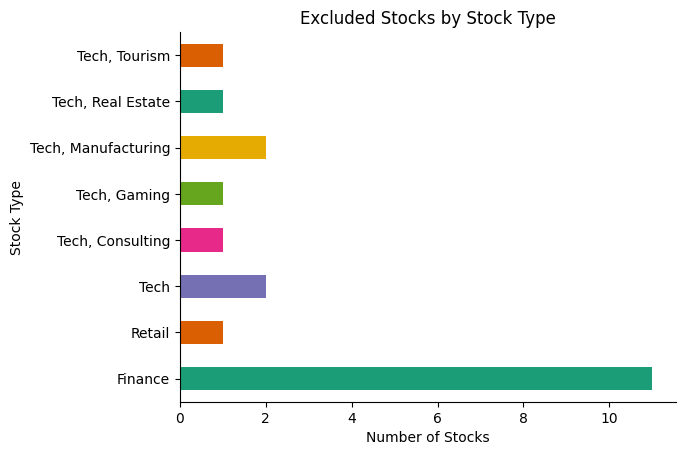

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
missing_df.groupby('Stock Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Number of Stocks")
plt.title("Excluded Stocks by Stock Type")
plt.show()

In [ ]:
for col in alt1pivot.columns:
  if col in missing_list:
    continue
  elif col not in missing_list and alt1pivot[col].isna()[0] == False:
    continue
  else:
    alt1pivot.drop(col, axis = 1, inplace = True)

In [ ]:
alt1pivot.head() #Data that has all stocks from alt_pivot + extra stocks present in pivot, but from 1995 onwards

Ticker,AAPL,ABCB,ACGL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,...,VLY,VRTX,WABC,WAFD,WBA,WERN,WSFS,WTFC,XEL,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-04,0.026058,-0.01031,NaN,-0.027484,-0.026217,-0.004273,0.03010,0.011407,-0.006211,0.025000,...,0.022322,-0.050000,0.000000,0.021126,0.000000,-0.016043,0.035715,NaN,0.002825,-0.018965
1995-01-05,-0.012699,0.00000,NaN,0.039131,0.009616,0.006438,0.00000,0.000000,0.012500,-0.004878,...,0.013100,-0.008772,0.000000,0.033231,0.000000,-0.010870,0.068965,NaN,0.002817,0.008787
1995-01-06,0.080386,0.00000,NaN,0.020920,0.028571,0.000000,0.00974,0.007519,0.006173,0.093137,...,-0.008621,0.044248,0.016949,0.000000,0.000000,0.000000,-0.096774,NaN,-0.002809,0.000000
1995-01-09,-0.018973,0.00000,NaN,0.012295,0.011111,0.000000,0.03053,-0.003732,0.024540,0.035874,...,0.004348,0.014831,0.000000,0.000000,0.005586,0.000000,0.000000,NaN,0.002817,0.010452
1995-01-10,0.060296,0.00000,NaN,0.018219,0.005494,0.014925,-0.03125,0.018727,0.029941,0.008658,...,-0.012987,0.068894,-0.016667,-0.006757,0.013889,0.010989,0.000000,NaN,0.002810,-0.020689


In [ ]:
alt1pivot.to_csv("/content/drive/MyDrive/Cleaned_Data/alt1_data.csv", index = True)

### 2.3.1 Data for Parameter Tuning of the 20 stocks for Variation 2 Scenario

In [ ]:
for col in alt1pivot.columns:
  if col in missing_list:
    continue
  else:
    alt1pivot.drop(col, axis = 1, inplace = True)

In [ ]:
alt1pivot = alt1pivot[alt1pivot.index > "2000-01-01"]

In [ ]:
alt1pivot = alt1pivot[alt1pivot.index < "2002-01-01"]

In [ ]:
alt1pivot.head(2)

Ticker,ACGL,AMZN,ANSS,ASML,BANR,BKNG,CFFN,CSGP,CTSH,DLTR,ERIE,ESGR,EWBC,HTLF,IBOC,NVDA,PPBI,TOWN,TTWO,WTFC
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,-0.089109,0.174056,0.005682,0.023077,0.004237,0.081794,-0.032052,-0.125436,-0.121784,0.009032,-0.044402,-0.009524,-0.049181,0.000000,-0.005650,-0.002663,-0.125000,0.028572,0.057971,-0.032787
2000-01-04,-0.005435,-0.083217,-0.028249,-0.066595,-0.004219,0.053659,-0.006622,0.031873,-0.033854,-0.001279,-0.034169,0.000000,-0.040230,0.007143,-0.012429,-0.026702,0.071428,-0.041667,-0.027397,0.000000


In [ ]:
alt1pivot.tail(2)

Ticker,ACGL,AMZN,ANSS,ASML,BANR,BKNG,CFFN,CSGP,CTSH,DLTR,ERIE,ESGR,EWBC,HTLF,IBOC,NVDA,PPBI,TOWN,TTWO,WTFC
Date,,,,,,,,,,,,,,,,,,,,
2001-12-28,0.000000,0.028302,-0.033163,0.001151,0.000000,0.017331,-0.012809,0.045781,-0.025199,0.010237,0.006309,0.000000,-0.030189,0.0,0.004806,-0.024071,0.0050,0.0,0.039873,-0.002567
2001-12-31,0.005859,-0.007339,-0.070863,-0.020115,-0.005294,-0.008518,-0.034291,0.030472,-0.045645,-0.021216,0.005485,0.012766,0.001945,0.0,-0.040082,-0.011963,0.0199,0.0,-0.015825,-0.016409


In [ ]:
alt1pivot.to_csv("/content/drive/MyDrive/Cleaned_Data/extra_params_data.csv", index = True)